This is a customer segmenation analysis based on the dataset provided by Data Science 365. It's a practice project.
The goal is to understand the segments of DS365 customers and recommend marketing strategies. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

In [2]:
# load dataset
df = pd.read_csv("customer_segmentation_data.csv")
df.shape


(3834, 4)

In [3]:
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


# Preprocessing

In [4]:
# check missing value
df['minutes_watched'].isnull().sum()

109

In [5]:
# fill missing values with 0
df['minutes_watched']= df['minutes_watched'].fillna(0)
df.shape

(3834, 4)

In [6]:
# check missing value
df['minutes_watched'].isnull().sum()

0

In [7]:
df.describe()

,minutes_watched,CLV,region,channel
count,3834.000000,3834.000000,3834.000000,3834.000000
mean,1916.028169,118.383920,1.167188,3.870370
std,7303.052488,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,137.000000,62.580000,0.000000,2.000000
50%,480.500000,119.000000,2.000000,3.000000
75%,1464.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [8]:
# EDA - df.describe(), df.corr()
df.corr()


,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.114153,0.040100,-0.003718
CLV,0.114153,1.000000,-0.273312,-0.026359
region,0.040100,-0.273312,1.000000,0.015098
channel,-0.003718,-0.026359,0.015098,1.000000


Text(0.5, 1.0, 'Visualization of raw data')

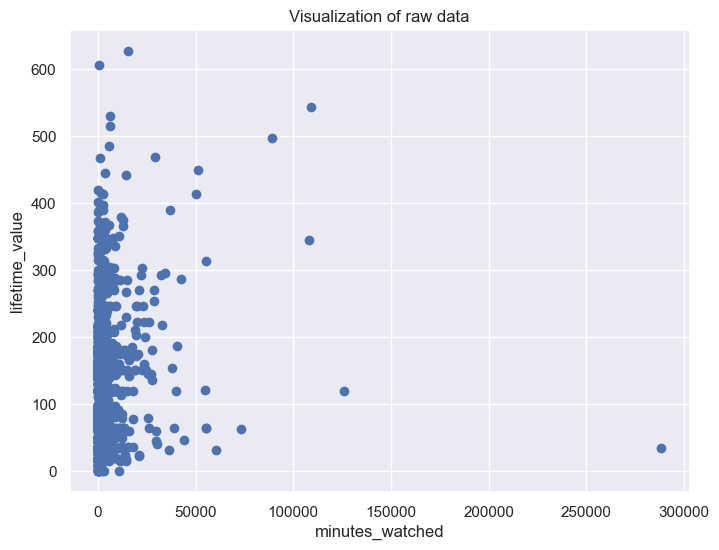

In [9]:
# plotting correlation in heatmap, scatter plot of continuous variables, etc.
plt.figure(figsize = (8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('minutes_watched')
plt.ylabel('lifetime_value')
plt.title('Visualization of raw data')


In [10]:
percentiles = np.arange(10, 100, 5)  # 10th, 20th, ..., 90th percentiles

# Calculate the percentiles
percentile_values = np.percentile(df['minutes_watched'], percentiles)

# Print the results
for percentile, value in zip(percentiles, percentile_values):
    print(f'{percentile}th percentile: {value}')

10th percentile: 24.0
15th percentile: 53.0
20th percentile: 94.0
25th percentile: 137.0
30th percentile: 189.0
35th percentile: 247.0
40th percentile: 313.20000000000005
45th percentile: 386.0
50th percentile: 480.5
55th percentile: 601.0
60th percentile: 748.7999999999997
65th percentile: 945.0
70th percentile: 1170.1
75th percentile: 1464.0
80th percentile: 1880.8000000000002
85th percentile: 2636.199999999999
90th percentile: 3886.800000000001
95th percentile: 7104.949999999986


In [11]:
percentiles = np.arange(10, 100, 5)  # 10th, 20th, ..., 90th percentiles

# Calculate the percentiles
percentile_values = np.percentile(df['CLV'], percentiles)

# Print the results
for percentile, value in zip(percentiles, percentile_values):
    print(f'{percentile}th percentile: {value}')

10th percentile: 36.0
15th percentile: 49.53
20th percentile: 62.58
25th percentile: 62.58
30th percentile: 64.8
35th percentile: 78.87
40th percentile: 91.56800000000001
45th percentile: 118.97
50th percentile: 119.0
55th percentile: 119.0
60th percentile: 121.0
65th percentile: 142.279
70th percentile: 149.51
75th percentile: 149.99
80th percentile: 168.074
85th percentile: 174.0
90th percentile: 184.44
95th percentile: 240.0


In [12]:
# remove outliers in minutes and CLV based on Z-score

# Calculate Z-scores
df['z_score_minutes'] = (df['minutes_watched'] - df['minutes_watched'].mean()) / df['minutes_watched'].std()

# Identify outliers
outliers = df[np.abs(df['z_score_minutes']) > 3]


In [13]:
outliers["minutes_watched"].min(), outliers["minutes_watched"].max()

(24213.0, 288508.0)

In [14]:
outliers.shape

(39, 5)

In [15]:
# check outliers in CLV
# Calculate Z-scores
df['z_score_clv'] = (df['CLV'] - df['CLV'].mean()) / df['CLV'].std()

# Identify outliers
outliers = df[np.abs(df['z_score_clv']) > 3]

In [16]:
outliers = df[np.abs(df['z_score_clv']) > 3]
outliers.shape

(72, 6)

In [17]:
outliers['CLV'].min(), outliers['CLV'].max()

(330.6, 626.4)

In [19]:
# remove outliers
df_outliers_rmved = df[(np.abs(df["z_score_minutes"])<=3) & (np.abs(df["z_score_clv"])<=3)]
df_outliers_rmved.shape

(3730, 6)

In [20]:
# drop useless cols
df_cleaned = df_outliers_rmved[["minutes_watched", "CLV", "region", "channel"]]
df_cleaned.shape

(3730, 4)

In [21]:
df_cleaned.describe()

,minutes_watched,CLV,region,channel
count,3730.000000,3730.000000,3730.000000,3730.000000
mean,1378.293029,113.078021,1.171850,3.875335
std,2610.638299,59.752914,0.923581,2.187940
min,0.000000,0.000000,0.000000,1.000000
25%,134.000000,62.580000,0.000000,2.000000
50%,462.000000,119.000000,2.000000,3.000000
75%,1399.750000,149.990000,2.000000,6.000000
max,23606.000000,327.610000,2.000000,8.000000


In [22]:
# Standardization using sklearn: scaler = StandardScaler()
scaler = StandardScaler()
df_std = scaler.fit_transform(df_cleaned)

# Clustering

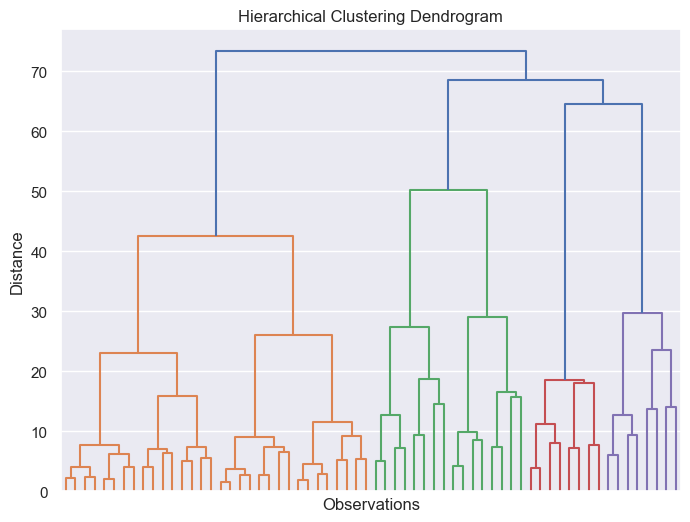

In [23]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(df_std, method = 'ward')

plt.figure(figsize = (8,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

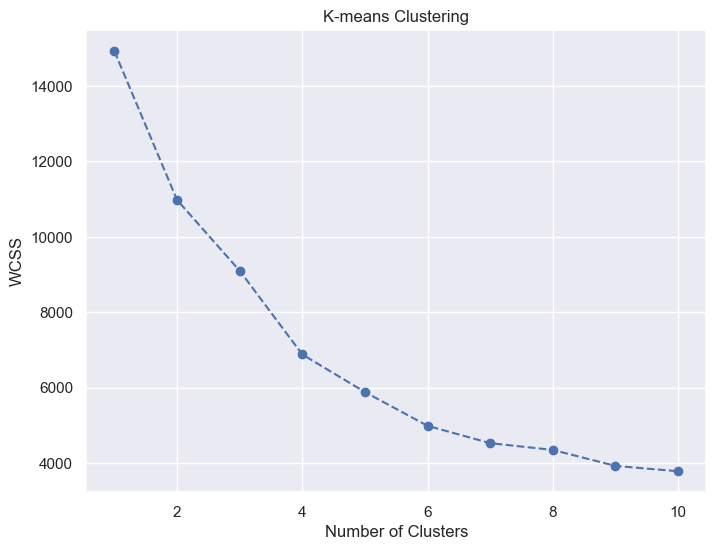

In [24]:
# Run a loop and use wcss to determine the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

4 clusters look good, also aliged with linkage matrix.

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [26]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [27]:
df_cls = df_cleaned.copy()
df_cls["kmeans_label"] = kmeans.labels_
df_cls["kmeans_label"].value_counts()

kmeans_label
0    1376
1    1231
2     948
3     175
Name: count, dtype: int64

# Interpreting Clusters

In [28]:
# summarize each cluster
cls_summary = df_cls.groupby(["kmeans_label"]).mean()
cls_summary['n_obs'] = df_cls.groupby(["kmeans_label"])['region'].size()
cls_summary = cls_summary.reset_index()
cls_summary

,kmeans_label,minutes_watched,CLV,region,channel,n_obs
0,0,994.853198,86.482558,1.960029,2.742006,1376
1,1,784.926889,144.055532,0.225020,2.744110,1231
2,2,942.561181,107.923397,1.228903,7.006329,948
3,3,10927.554286,132.213029,1.325714,3.782857,175


Characteristics of each cluster
- 0 "low value learners": avg minutes, low CLV, mostly from outside North America/UK/AUS
- 1 "high value learners": short minutes, high CLV, mostly from North America/UK/AUS 
- 2 "friend referrals": avg minutes, avg CLV, mostly from non-social media (friend, other)
- 3 "serious learners": long minutes, high CLV, smallest population 

In [29]:
# Group by 'segment' and 'region' and count the occurrences
summary_df = df_cls.groupby(['kmeans_label', 'region']).size().unstack(fill_value=0)
# Reset the index to make 'segment' a column again (optional)
summary_df = summary_df.reset_index()
summary_df

region,kmeans_label,0,1,2
0,0,0,55,1321
1,1,978,229,24
2,2,297,137,514
3,3,50,18,107


In [30]:
# Group by 'segment' and 'region' and count the occurrences
summary_df = df_cls.groupby(['kmeans_label', 'channel']).size().unstack(fill_value=0)
# Reset the index to make 'segment' a column again (optional)
summary_df = summary_df.reset_index()
summary_df

channel,kmeans_label,1,2,3,4,5,6,7,8
0,0,311,180,475,373,37,0,0,0
1,1,305,108,524,238,10,39,7,0
2,2,0,0,0,0,7,240,441,260
3,3,33,10,57,30,3,7,19,16


# Recommendations for Marketing Strategies
- Focus on consumers in North America/EURO/AUS, who has the highest spending
- Target these consumers through social media channels such as Youtube, LinkedIn, Google
- Possible marketing strategies include ads and data science influencers
- Next step: demographic data about these consumers, such as their gender/age/current occupation. This info would help us choose better ads channels and influencers. 


In [31]:
# save models: scaler, kmeans
pickle.dump(scaler, open('cust_segm_scaler.pkl', 'wb'))

In [32]:
pickle.dump(kmeans, open('cust_segm_kmeans.pkl', 'wb'))